In [1]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dtype = np.float64

In [2]:
redimage1 = Image.open("ColorImages/apple.jpg")
redimage2 = Image.open("ColorImages/rose.jpg")
redimage3 = Image.open("ColorImages/tomato.jpg")
greenimage1 = Image.open("ColorImages/gapple.jpg")
greenimage2 = Image.open("ColorImages/leaf.jpg")
greenimage3 = Image.open("ColorImages/melon.jpg")
blueimage1 = Image.open("ColorImages/dust.jpg")
blueimage2 = Image.open("ColorImages/man.jpg")
blueimage3 = Image.open("ColorImages/watch.jpg")

In [3]:
transform = transforms.ToTensor()
r1tdat = transform(redimage1)
r2tdat = transform(redimage2)
r3tdat = transform(redimage3)
g1tdat = transform(greenimage1)
g2tdat = transform(greenimage2)
g3tdat = transform(greenimage3)
b1tdat = transform(blueimage1)
b2tdat = transform(blueimage2)
b3tdat = transform(blueimage3)

In [4]:
r1mean = torch.mean(r1tdat, dim =[1,2])
r2mean = torch.mean(r2tdat, dim =[1,2])
r3mean = torch.mean(r3tdat, dim =[1,2])
g1mean = torch.mean(g1tdat, dim =[1,2])
g2mean = torch.mean(g2tdat, dim =[1,2])
g3mean = torch.mean(g3tdat, dim =[1,2])
b1mean = torch.mean(b1tdat, dim =[1,2])
b2mean = torch.mean(b2tdat, dim =[1,2])
b3mean = torch.mean(b3tdat, dim =[1,2])

In [5]:
print("Red Image 1 Mean: ", r1mean)
print("Red Image 2 Mean: ", r2mean)
print("Red Image 3 Mean: ", r3mean)
print("Green Image 1 Mean: ", g1mean)
print("Green Image 2 Mean: ", g2mean)
print("Green Image 3 Mean: ", g3mean)
print("Blue Image 1 Mean: ", b1mean)
print("Blue Image 2 Mean: ", b2mean)
print("Blue Image 3 Mean: ", b3mean)

Red Image 1 Mean:  tensor([0.8193, 0.6404, 0.6604])
Red Image 2 Mean:  tensor([0.6156, 0.0473, 0.0296])
Red Image 3 Mean:  tensor([0.8550, 0.2780, 0.1751])
Green Image 1 Mean:  tensor([0.7839, 0.8611, 0.5716])
Green Image 2 Mean:  tensor([0.5041, 0.6186, 0.1764])
Green Image 3 Mean:  tensor([0.2467, 0.5229, 0.2146])
Blue Image 1 Mean:  tensor([0.6180, 0.6480, 0.8428])
Blue Image 2 Mean:  tensor([0.0651, 0.1343, 0.3105])
Blue Image 3 Mean:  tensor([0.6594, 0.6975, 0.7729])


In [18]:
from sklearn.preprocessing import StandardScaler
featuresscaler = StandardScaler()
def model(t_u, w1, w2, b):
    return pow((w2*t_u),2)+(w1*t_u)+b
def loss_fn(t_p, t_c):
    squared_diffs = pow((t_p - t_c),2)
    return squared_diffs.mean()
def dmodel_dw1(t_u, w1, w2, b):
    return t_u
def dmodel_dw2(t_u, w1, w2, b):
    return t_u
def dmodel_db(t_u, w1, w2, b):
    return 1
def dloss_fn(t_p, t_c):
    dsq_diffs = (2 * (t_p - t_c)) / t_p.size(0)
    return dsq_diffs
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
    
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

    
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

In [19]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    losshistory = np.zeros(n_epochs+1)
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)

        params = params - learning_rate * grad
        losshistory[epoch] = float(loss)
     
    return params

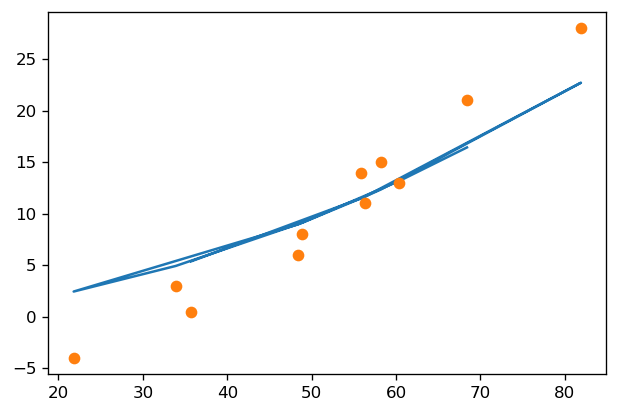

In [42]:
params = training_loop(n_epochs = 5000, learning_rate = 0.0000000005, params = torch.tensor([1, 1, 0]), t_u = t_u, t_c = t_c);
t_un = 0.1 * t_u
t_p = model(t_un, *params)
fig = plt.figure(dpi=120)
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [9]:
data = pd.read_csv("https://raw.githubusercontent.com/NickCoyle98/Homework/main/Homework%201/Housing.csv")
data.head()
from sklearn.preprocessing import StandardScaler
featuresscaler = StandardScaler()

In [10]:
area = data.iloc[:,1].values
bedrooms = data.iloc[:,2].values
bathrooms = data.iloc[:,3].values
stories = data.iloc[:,4].values
parking = data.iloc[:,10].values
price = data.iloc[:,0].values
tarea = area.reshape(-1,1)
tbedrooms = bedrooms.reshape(-1,1)
tbathrooms = bathrooms.reshape(-1,1)
tstories = stories.reshape(-1,1)
tparking = parking.reshape(-1,1)
tprice = price.reshape(-1,1)
sarea = featuresscaler.fit_transform(tarea)
sbedrooms = featuresscaler.fit_transform(tbedrooms)
sbathrooms = featuresscaler.fit_transform(tbathrooms)
sstories = featuresscaler.fit_transform(tstories)
sparking = featuresscaler.fit_transform(tparking)
sprice = featuresscaler.fit_transform(tprice)
area = sarea.reshape(1,-1)
bedrooms = sbedrooms.reshape(1,-1)
bathrooms = sbathrooms.reshape(1,-1)
stories = sstories.reshape(1,-1)
parking = sparking.reshape(1,-1)
price = sprice.reshape(1,-1)

In [11]:
area = torch.tensor(area)
bedrooms = torch.tensor(bedrooms)
bathrooms = torch.tensor(bathrooms)
stories = torch.tensor(stories)
parking = torch.tensor(parking)
price = torch.tensor(price)

In [12]:
w1 = torch.ones(())
w2 = torch.ones(())
w3 = torch.ones(())
w4 = torch.ones(())
w5 = torch.ones(())
b = torch.zeros(())

In [13]:
def model(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b):
    return (area*w1) + (bedrooms*w2) + (bathrooms*w3) + (stories*w4) + (parking*w5) + b
def loss_fn(t_p, price):
    squared_diffs = pow((t_p - price),2)
    return squared_diffs.mean()
def dmodel_dw1(area, w1, b):
    return area
def dmodel_dw2(bedrooms, w2, b):
    return bedrooms
def dmodel_dw3(bathrooms, w3, b):
    return bathrooms
def dmodel_dw4(stories, w4, b):
    return stories
def dmodel_dw5(parking, w5, b):
    return parking
def dmodel_db(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b):
    return 1
def dloss_fn(t_p, price):
    dsq_diffs = (2 * (t_p - price)) / t_p.size(0)
    return dsq_diffs
def grad_fn(area, bedrooms, bathrooms, stories, parking, price, t_p, w1, w2, w3, w4, w5, b):
    dloss_dtp = dloss_fn(t_p, price)
    dloss_dw1 = dloss_dtp * dmodel_dw1(area, w1, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(bedrooms, w2, b)
    dloss_dw3 = dloss_dtp * dmodel_dw2(bathrooms, w3, b)
    dloss_dw4 = dloss_dtp * dmodel_dw2(stories, w4, b)
    dloss_dw5 = dloss_dtp * dmodel_dw2(parking, w5, b)
    dloss_db = dloss_dtp * dmodel_db(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b)
    
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_dw3.sum(), dloss_dw4.sum(), dloss_dw5.sum(), dloss_db.sum()])
def training_loop(n_epochs, learning_rate, params, area, bedrooms, bathrooms, stories, parking,  price):
    losshistory = np.zeros(n_epochs+1)
    for epoch in range(1, n_epochs + 1):
        w1, w2, w3, w4, w5, b = params
        t_p = model(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b)
        loss = loss_fn(t_p, price)
        grad = grad_fn(area, bedrooms, bathrooms, stories, parking, price, t_p, w1, w2, w3, w4, w5, b)

        params = params - learning_rate * grad
        losshistory[epoch] = float(loss)
     
    return losshistory

In [14]:
loss = training_loop(n_epochs = 5000, learning_rate = 0.0001, params = torch.tensor([1, 1, 1, 1, 1, 0]), area = area, bedrooms = bedrooms, bathrooms = bathrooms, stories = stories, parking = parking, price = price);
print(loss[0])
print(loss[500])
print(loss[1000])
print(loss[1500])
print(loss[2000])
print(loss[2500])
print(loss[3000])
print(loss[3500])
print(loss[4000])
print(loss[4500])
print(loss[5000])

0.0
0.4384174561320197
0.4384174561320197
0.4384174561320197
0.4384174561320197
0.4384174561320197
0.4384174561320197
0.4384174561320197
0.4384174561320197
0.4384174561320197
0.4384174561320197


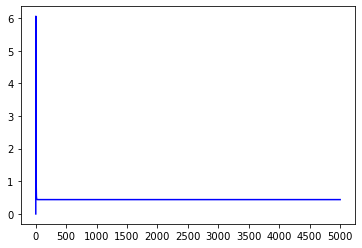

In [15]:
plt.plot(range(1,5000 +2), loss, color = 'blue')
plt.xticks(np.arange(0, 5000+2, 500));

In [16]:
t_p = model(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b)
fig = plt.figure(dpi=600)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 3600x2400 with 0 Axes>